In [1]:
# Resampling 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\Datasets")

In [28]:
df=pd.read_csv("monthly-milk-production-pounds-p.csv",index_col=0)
            
df.head()

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


In [29]:
df.index=pd.to_datetime(df.index).to_period("M")   #  convert index as datetime (monthly data)    # default index type is object 
# converting it to datetime 

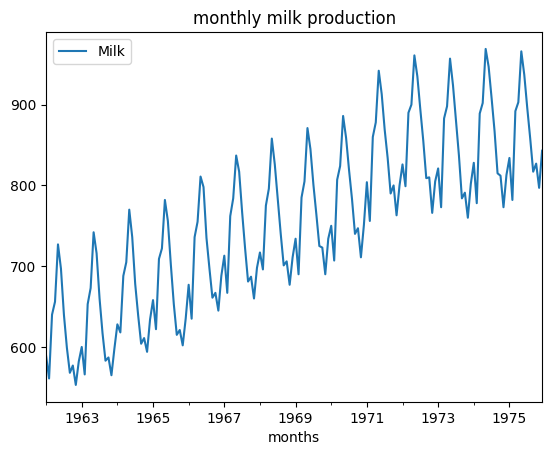

In [30]:
df.plot()
plt.title("monthly milk production")
plt.xlabel("months")
plt.show()

In [31]:
# down sampling

downsampled=df.resample("Q").sum()
downsampled.index.rename("Quarter",inplace=True)

C:\Users\dbda\AppData\Local\Temp\ipykernel_10404\88063598.py:3: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  downsampled=df.resample("Q").sum()


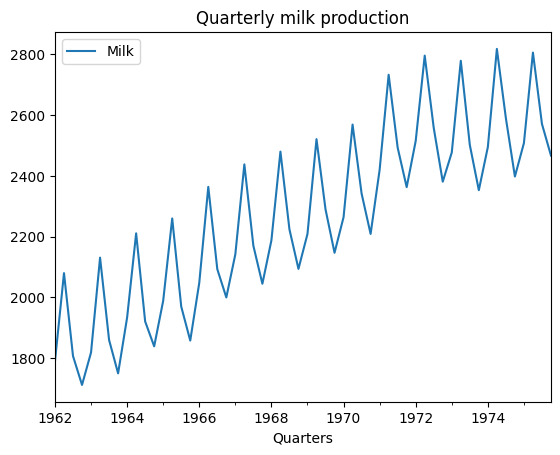

In [32]:
downsampled.plot()
plt.title("Quarterly milk production")
plt.xlabel("Quarters")
plt.show()

# converting daily temperature to monthly average templerature


In [33]:
temp_data=pd.read_csv("daily-minimum-temperatures-in-me.csv",index_col=0)
idx=pd.to_datetime(temp_data.index).to_period("D")
temp_data.index=idx
temp_data.head()

,min_temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


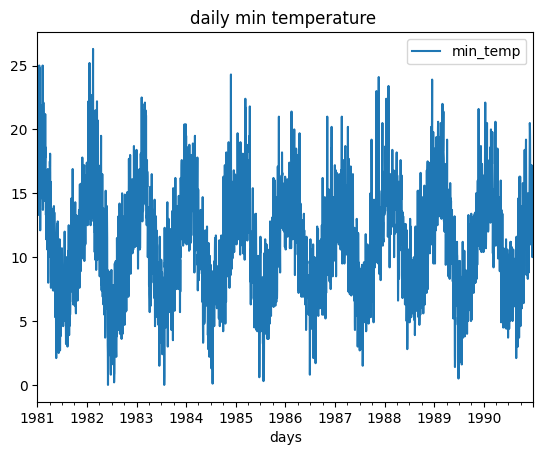

In [34]:
temp_data.plot()
plt.title("daily min temperature ")
plt.xlabel("days")
plt.show()

C:\Users\dbda\AppData\Local\Temp\ipykernel_10404\2992767790.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  temp_month=temp_data.resample("M").mean()


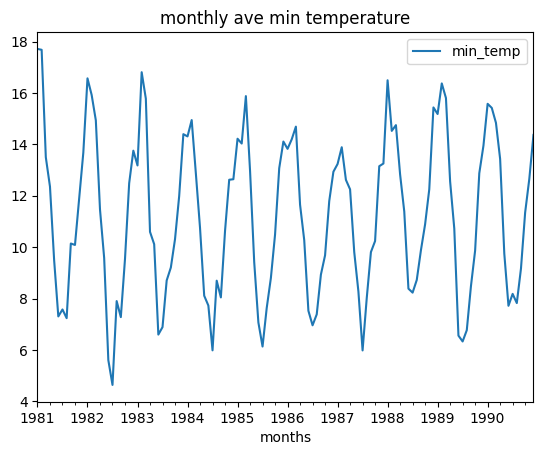

In [35]:
temp_month=temp_data.resample("M").mean()
temp_month.index.rename("Monthly",inplace=True)
temp_month.plot()
plt.title("monthly ave min temperature")
plt.xlabel("months")
plt.show()

# centred moving average line smothning technique

In [66]:
df=pd.read_csv("monthly-milk-production-pounds-p.csv",index_col=0)
df.index=pd.to_datetime(df.index).to_period("M")   #  convert index as datetime (monthly data)    # default index type is object 
# converting it to datetime 


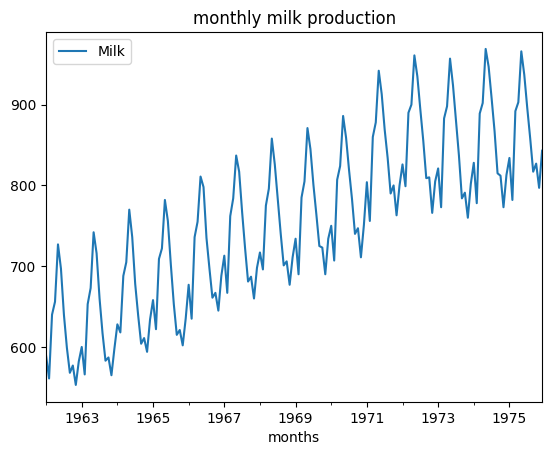

In [49]:
df.plot()
plt.title("monthly milk production")
plt.xlabel("months")
plt.show()

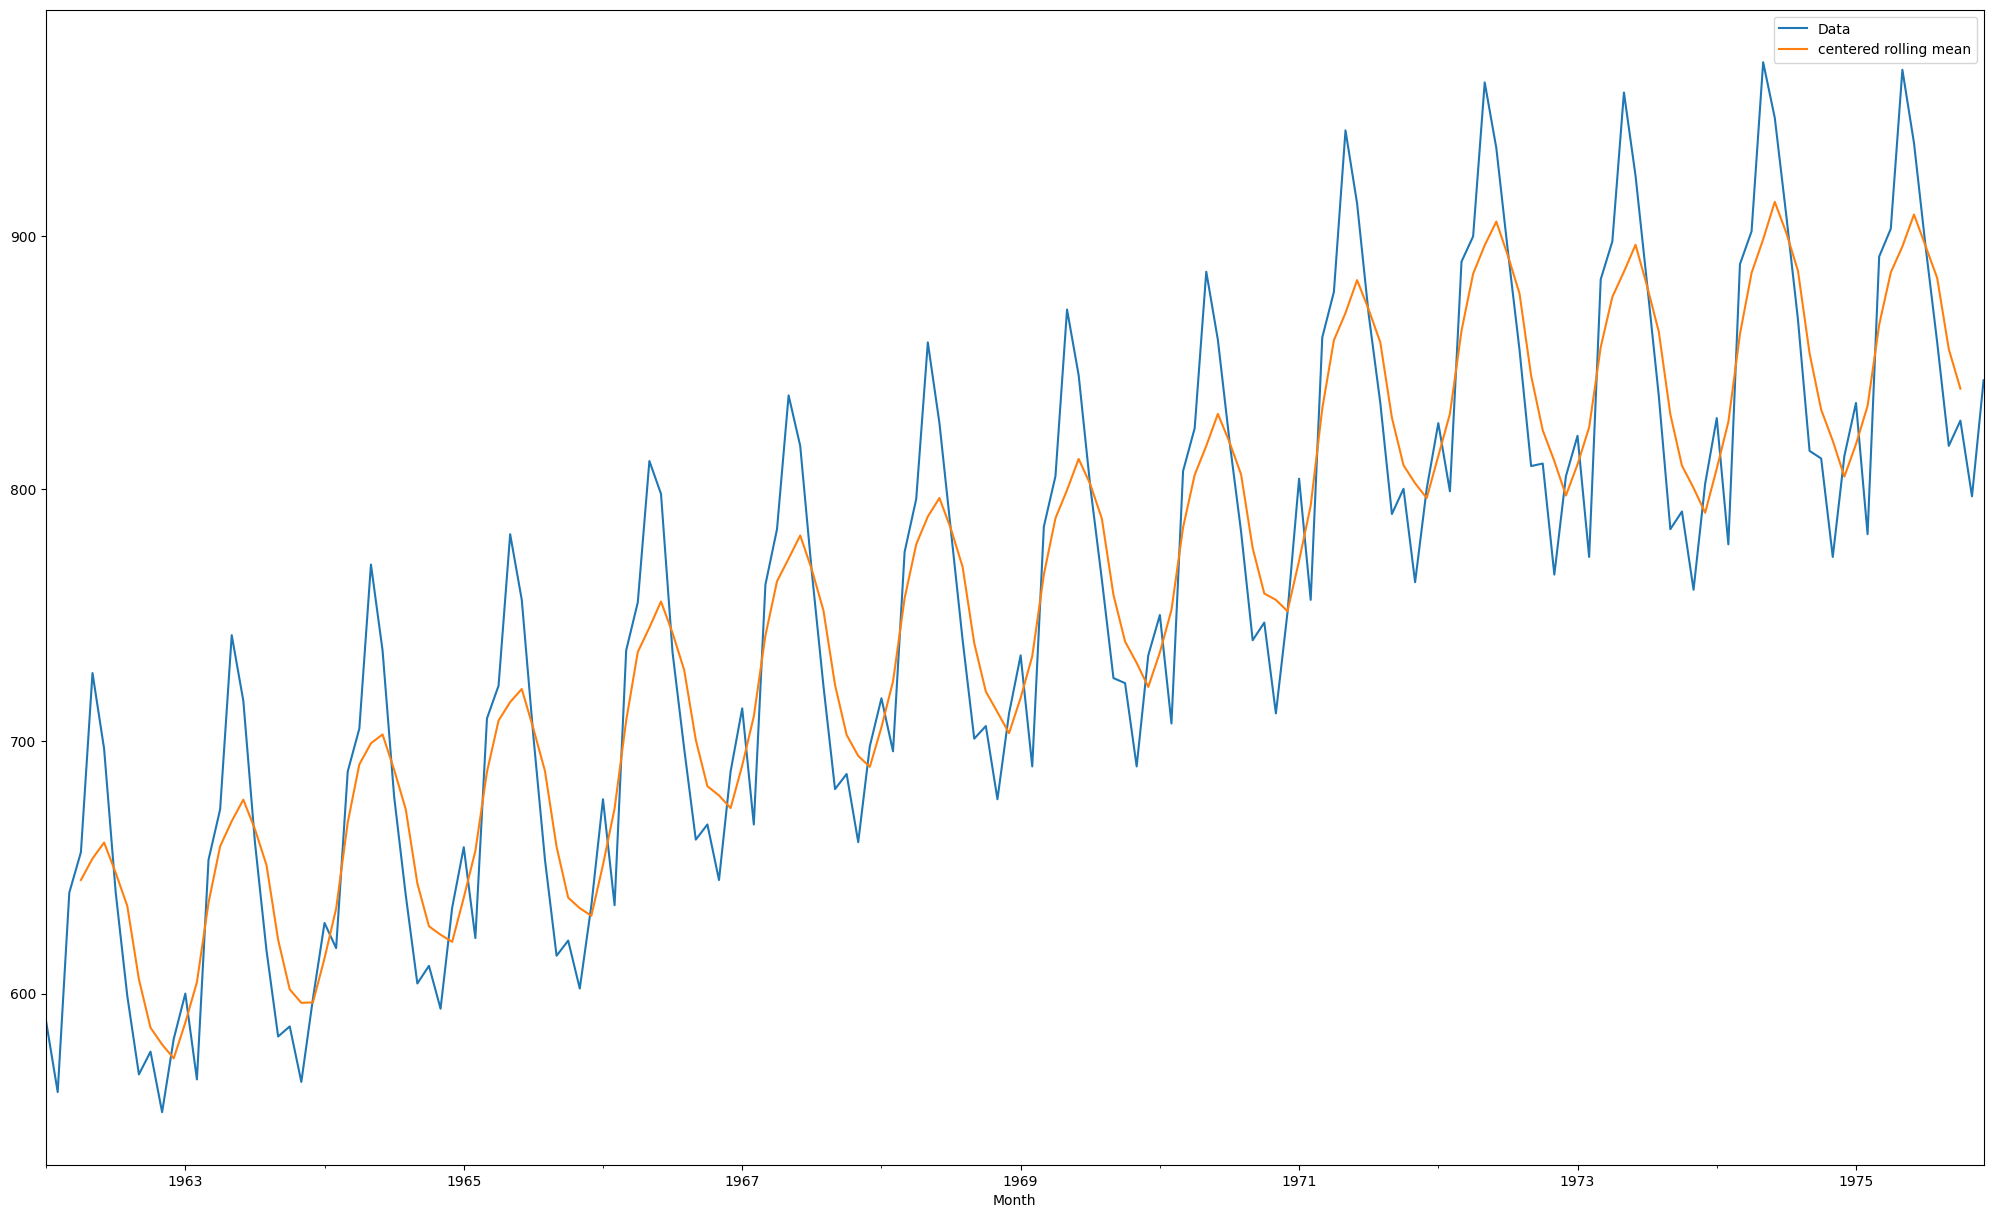

In [56]:
y=df["Milk"]
# # centered roling mean
span =6
plt.figure(figsize=(25,15))
fcast=y.rolling(span,center=True).mean()
y.plot(label="Data")
fcast.plot(label="centered rolling mean")
plt.legend(loc="best")
plt.show()

# additive decomposition

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

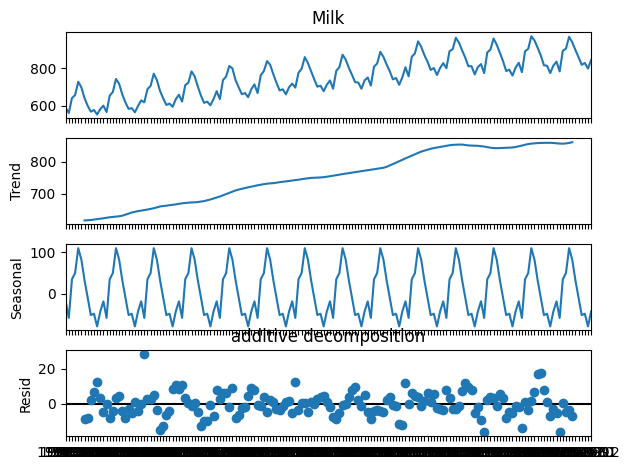

In [60]:
df=pd.read_csv("monthly-milk-production-pounds-p.csv",index_col=0)
#df.index=pd.to_datetime(df.index).to_period("M")   #  convert index as datetime (monthly data)    # default index type is object 
# converting it to datetime 

series =df["Milk"]
result=seasonal_decompose(series,model="additive",period=12)
result.plot()
plt.title("additive decomposition")
plt.show()

# multiplicative decomposition

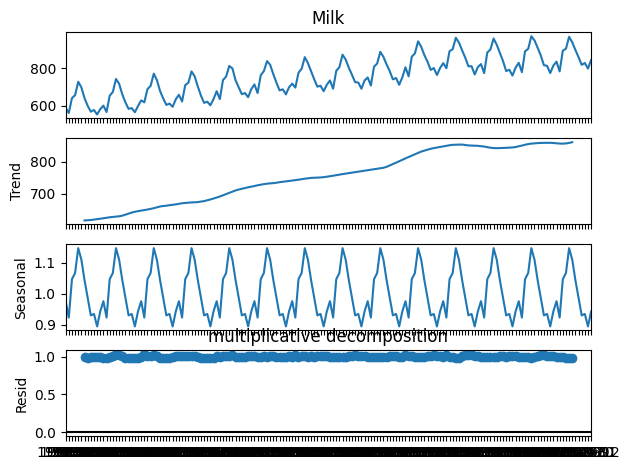

In [61]:
series=df["Milk"]
result=seasonal_decompose(series,model="multiplicative",period=12)
result.plot()
plt.title("multiplicative decomposition")
plt.show()



# Forecasting

In [74]:
from sklearn.metrics import mean_squared_error

df=pd.read_csv("monthly-milk-production-pounds-p.csv",index_col=0)
df.index=pd.to_datetime(df.index).to_period("M")   #  convert index as datetime (monthly data)    # default index type is object 
# converting it to datetime 

y =df["Milk"]

In [75]:
y_train=df["Milk"].iloc[:-12]
y_test =df["Milk"].iloc[-12:]  # we spliting data in to train test in these way because we dont want random data 

In [76]:
print(y.shape)
print(y_train.shape,y_test.shape)

(168,)
(156,) (12,)


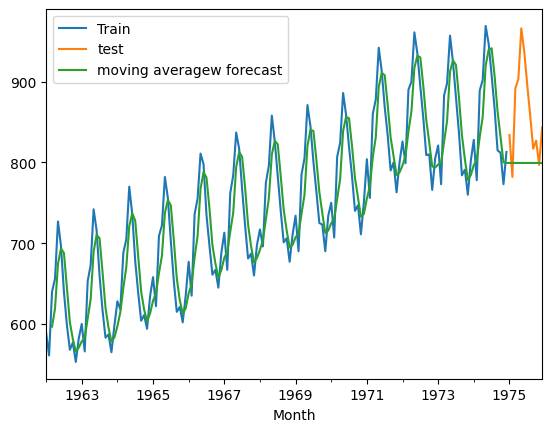

In [95]:
# plotig
span=3

fcast=y_train.rolling(span).mean()
ma=fcast.iloc[-1]
ma_series=pd.Series(ma.repeat(len(ytest)))
ma_fcast=pd.concat([fcast,ma_series],ignore_index=True)
ma_fcast.index=y.index
y_train.plot(label="Train")
y_test.plot(label="test")
ma_fcast.plot(label="moving averagew forecast")
plt.legend(loc="best")
plt.show()

In [96]:
print(mean_squared_error(y_test,ma_series))

6945.1666666666615


In [97]:
# simple exponential smoothing

In [98]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [115]:
alpha=0.1
ses=SimpleExpSmoothing(y_train)
fit1=ses.fit(smoothing_level=alpha)
fcast1=fit1.forecast(len(y_test))


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


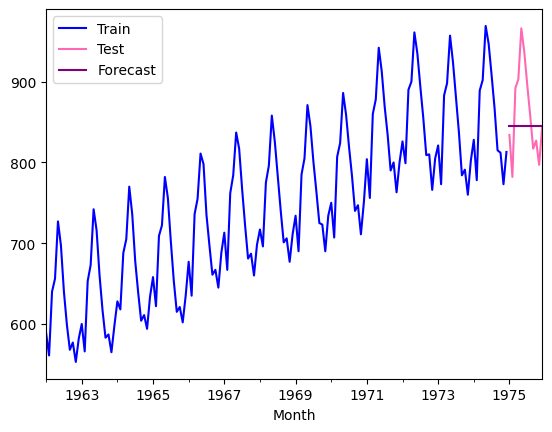

In [116]:
# plot
y_train.plot(color="blue",label="Train")
y_test.plot(color="hotpink",label="Test")
fcast1.plot(color="purple",label="Forecast")
plt.legend(loc="best")
plt.show()

In [117]:
print(mean_squared_error(y_test,fcast1))

3251.7454435503296


# holt linear Trend method

In [139]:
alpha=0.2
beta=0.1


## linear trend


In [140]:
from statsmodels.tsa.api import Holt
holt =Holt(y_train)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1=fit1.forecast(len(y_test))

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


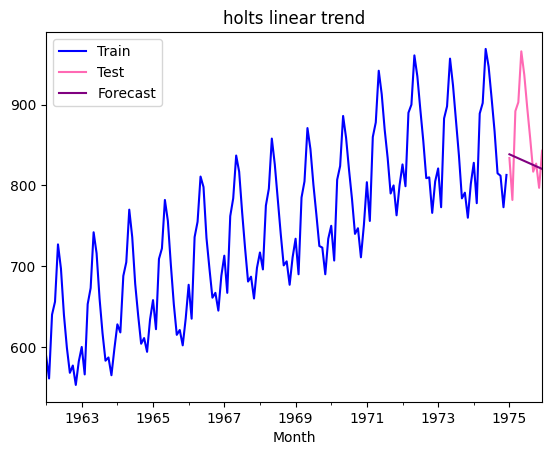

In [141]:
## plot
# plot
y_train.plot(color="blue",label="Train")
y_test.plot(color="hotpink",label="Test")
fcast1.plot(color="purple",label="Forecast")
plt.title("holts linear trend")
plt.legend(loc="best")
plt.show()

In [142]:
print(mean_squared_error(y_test,fcast1))

3929.516947213982


# exponential trend

In [143]:
alpha=0.2
beta=0.1


In [144]:
from statsmodels.tsa.api import Holt
holt =Holt(y_train,exponential=True)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1=fit1.forecast(len(y_test))

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


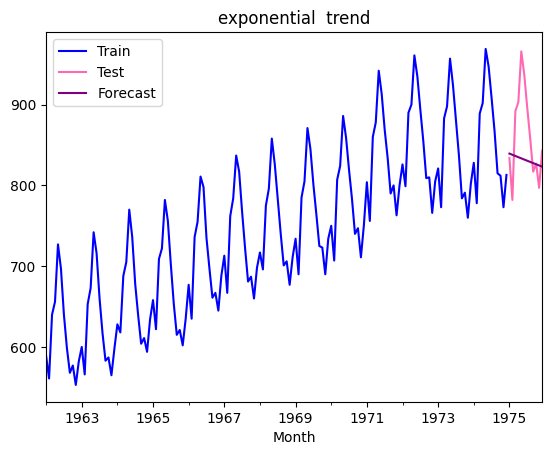

In [145]:
## plot
# plot
y_train.plot(color="blue",label="Train")
y_test.plot(color="hotpink",label="Test")
fcast1.plot(color="purple",label="Forecast")
plt.title("exponential  trend")
plt.legend(loc="best")
plt.show()

In [146]:
print(mean_squared_error(y_test,fcast1))

3819.6831290651076


# additive damped trend method

# autotuning - if you dont specify parameters then it will tune parameters as best fit all related function


In [165]:
# additive damped 
alpha=0.2
beta=0.1
phi=0.3


In [166]:
from statsmodels.tsa.api import Holt
holt =Holt(y_train,damped_trend=True)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=phi)

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


# no params autotuning


In [167]:
fit1=holt.fit()
fcast1=fit1.forecast(len(y_test))

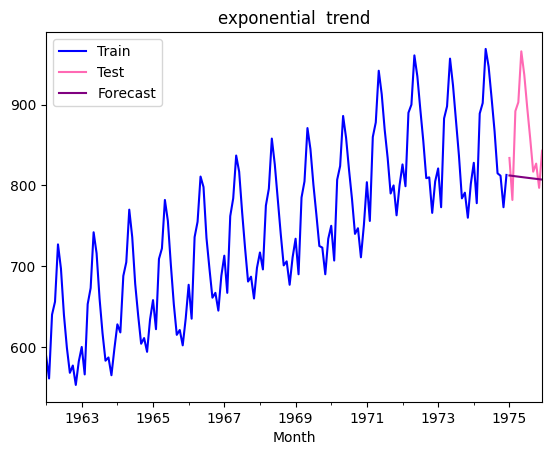

In [168]:
#plot
y_train.plot(color="blue",label="Train")
y_test.plot(color="hotpink",label="Test")
fcast1.plot(color="purple",label="Forecast")
plt.title("exponential  trend")
plt.legend(loc="best")
plt.show()

In [169]:
fit1.params

{'smoothing_level': 0.995,
 'smoothing_trend': 0.02369047619047619,
 'smoothing_seasonal': nan,
 'damping_trend': 0.99,
 'initial_level': 589.0,
 'initial_trend': -28.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [170]:
print(mean_squared_error(y_test,fcast1))

5701.109066816841


# multiplicative


In [171]:
# additive damped 
alpha=0.2
beta=0.1
phi=0.3


In [172]:
from statsmodels.tsa.api import Holt
holt =Holt(y_train,damped_trend=True,exponential=True)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=phi)

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [173]:
fit1=holt.fit()
fcast1=fit1.forecast(len(y_test))

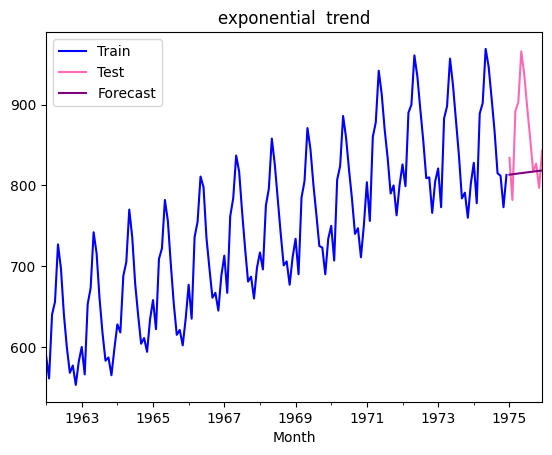

In [174]:
#plot
y_train.plot(color="blue",label="Train")
y_test.plot(color="hotpink",label="Test")
fcast1.plot(color="purple",label="Forecast")
plt.title("exponential  trend")
plt.legend(loc="best")
plt.show()

In [175]:
print(mean_squared_error(y_test,fcast1))

5158.137306412681


# sales of shampoo dataset - doing all smoothing methods

In [244]:
df=pd.read_csv("sales-of-shampoo-over-a-three-ye.csv",index_col=0)
            
df.head()

,Sales of shampoo over a three year period
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


In [245]:
df.index=pd.to_datetime(df.index).to_period("M")   #  convert index as datetime (monthly data)    # default index type is object 
# converting it to datetime 

In [246]:
df.head()

,Sales of shampoo over a three year period
Month,
2001-01,266.0
2001-02,145.9
2001-03,183.1
2001-04,119.3
2001-05,180.3


In [247]:
y=df["Sales of shampoo over a three year period"]
y_train=df["Sales of shampoo over a three year period"].iloc[:-6]
y_test =df["Sales of shampoo over a three year period"].iloc[-6:]  # we spliting data in to train test in these way because we dont want random data 

In [248]:
print(y_train.shape,y_test.shape)

(30,) (6,)


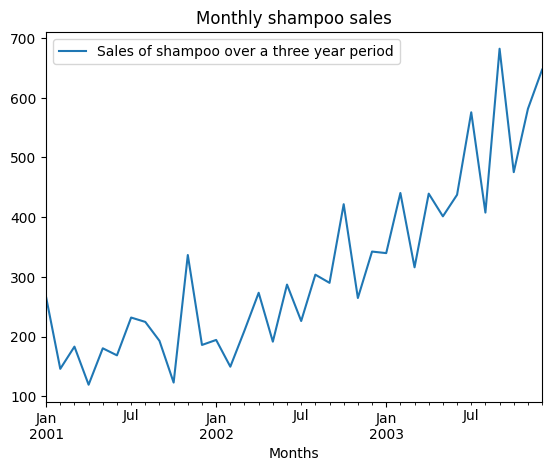

In [249]:
df.plot()
plt.title("Monthly shampoo sales")
plt.xlabel("Months")
plt.show()


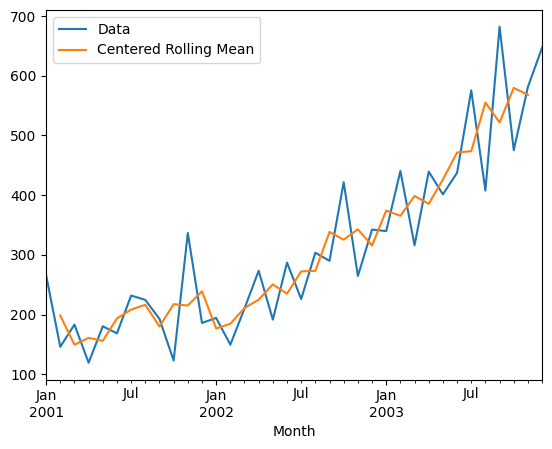

In [250]:
#### Centered Rolling Mean
span=3
fcast = y.rolling(span,center=True).mean()
y.plot(label='Data')
fcast.plot(label='Centered Rolling Mean')
plt.legend(loc='best')
plt.show()

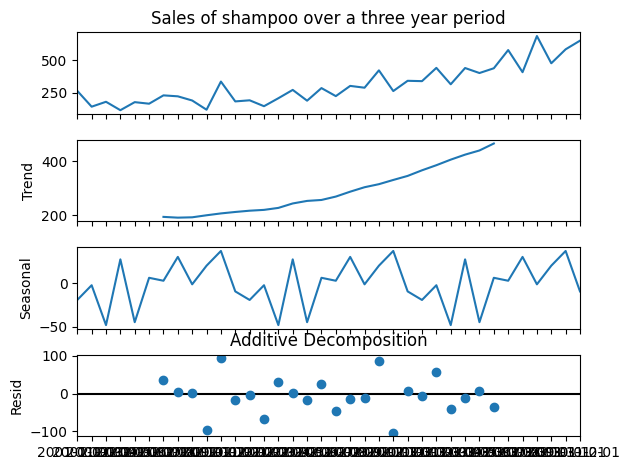

In [251]:
############ Decomposition ################
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv",
                 index_col=0)
series = df['Sales of shampoo over a three year period']
result = seasonal_decompose(series,
         model='additive',period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

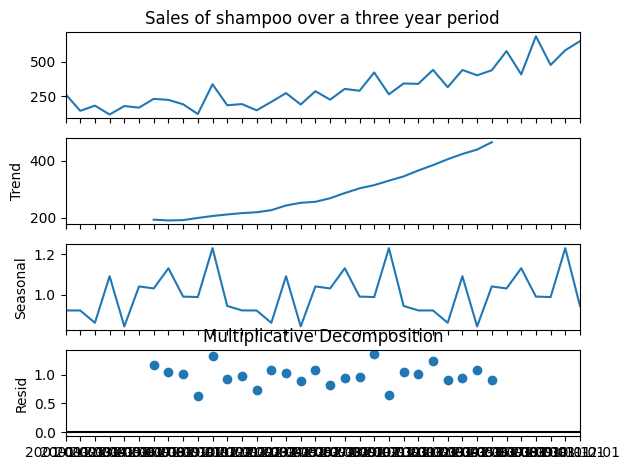

In [252]:
series = df['Sales of shampoo over a three year period']
result = seasonal_decompose(series, 
         model='multiplicative',period=12)
result.plot()
plt.title("Multiplicative Decomposition")
plt.show()

In [302]:
##############################################
df = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv",
                 index_col=0)
df.index = pd.to_datetime( df.index ).to_period("M")

y = df['Sales of shampoo over a three year period']
y_train = df['Sales of shampoo over a three year period'].iloc[:-6]
y_test = df['Sales of shampoo over a three year period'].iloc[-6:]
print(y.shape)
print(y_train.shape, y_test.shape)

(36,)
(30,) (6,)


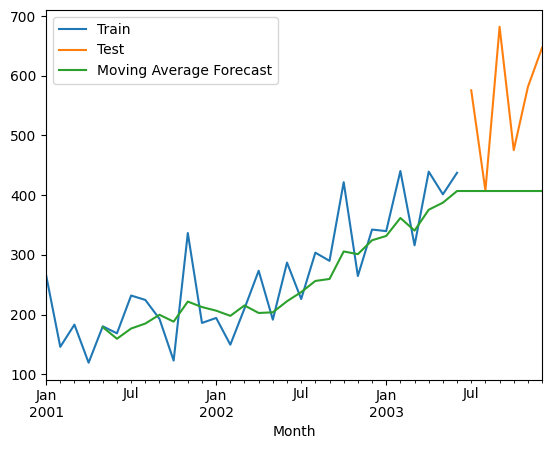

32812.427599999995


In [303]:
span=5
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)
MA_fcast.index = y.index
y_train.plot(label='Train')
y_test.plot(label='Test')
MA_fcast.plot(label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

print(mean_squared_error(y_test, MA_series))


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


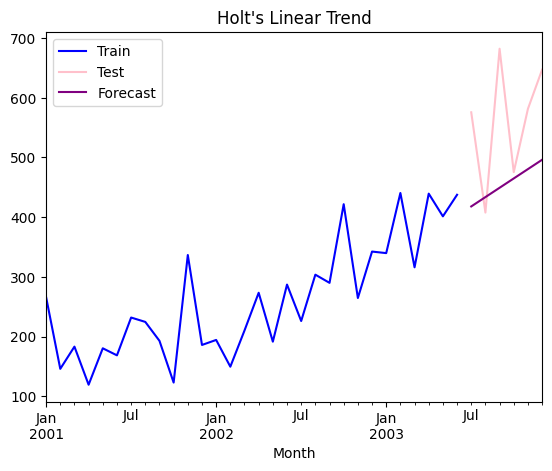

18800.307202532833


In [304]:
###### Holt's Linear
alpha = 0.2
beta = 0.1
### Linear Trend
from statsmodels.tsa.api import Holt
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level=alpha,
            smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()

print(mean_squared_error(y_test, fcast1))

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


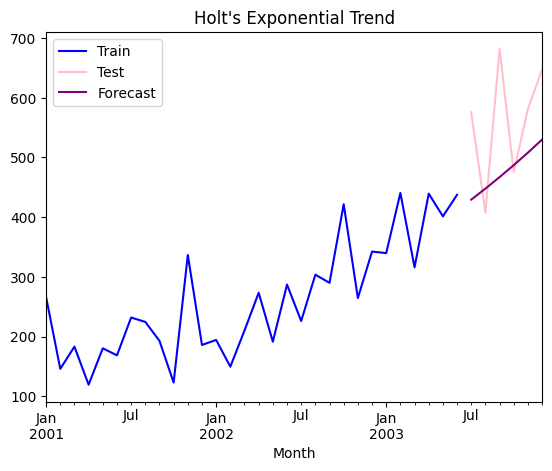

14740.421926283148


In [305]:
# Holt's Exponential Method
alpha = 0.2
beta = 0.1
from statsmodels.tsa.api import Holt
holt = Holt(y_train, exponential=True)
fit1 = holt.fit(smoothing_level=alpha,
            smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')

plt.title("Holt's Exponential Trend")
plt.legend(loc='best')
plt.show()

print(mean_squared_error(y_test, fcast1))


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


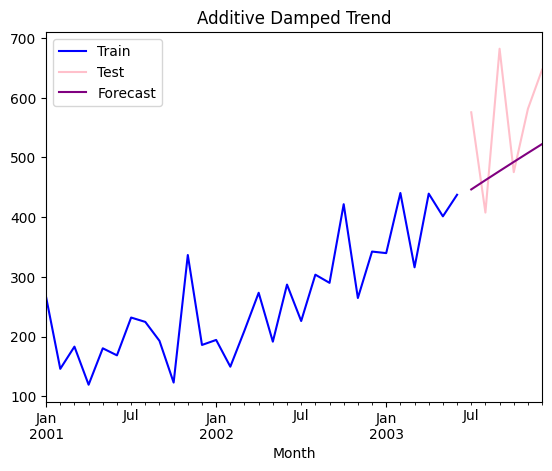

{'smoothing_level': 0.49999999999999994, 'smoothing_trend': 0.49999999999999994, 'smoothing_seasonal': nan, 'damping_trend': 0.99, 'initial_level': 266.0, 'initial_trend': -120.1, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
13802.395405345058


In [306]:
##### Additive Damped
alpha = 0.2
beta = 0.1
phi = 0.3
from statsmodels.tsa.api import Holt
holt = Holt(y_train, damped_trend=True)
fit1 = holt.fit(smoothing_level=alpha,
            smoothing_trend=beta, damping_trend=phi)
### no params - autotuning
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("Additive Damped Trend")
plt.legend(loc='best')
plt.show()

print(fit1.params)

print(mean_squared_error(y_test, fcast1))


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


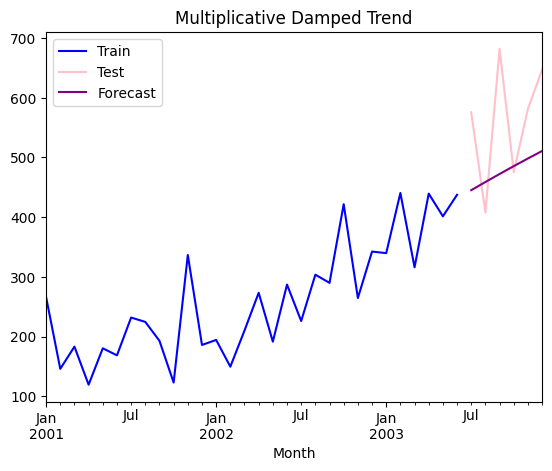

{'smoothing_level': 0.4329796910188957, 'smoothing_trend': 0.3275867694882713, 'smoothing_seasonal': nan, 'damping_trend': 0.9511983905867463, 'initial_level': 266.0, 'initial_trend': 0.5937878322128042, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
14865.167847263838


In [307]:
##### Multiplicative Damped
alpha = 0.2
beta = 0.1
phi = 0.3
from statsmodels.tsa.api import Holt
holt = Holt(y_train, damped_trend=True, exponential=True)
fit1 = holt.fit(smoothing_level=alpha,
            smoothing_trend=beta, damping_trend=phi)
### no params - autotuning
fit1 = holt.fit()
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("Multiplicative Damped Trend")
plt.legend(loc='best')
plt.show()

print(fit1.params)

print(mean_squared_error(y_test, fcast1))


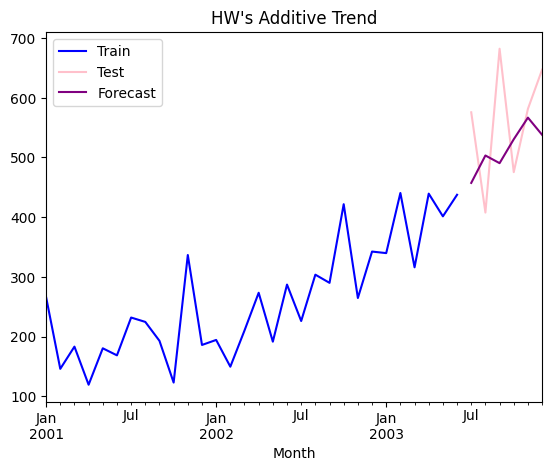

{'smoothing_level': 0.22078912327945582, 'smoothing_trend': 0.2206095088529235, 'smoothing_seasonal': 0.0012983553128902295, 'damping_trend': nan, 'initial_level': 186.47710130168136, 'initial_trend': -2.1588008110478363, 'initial_seasons': array([ 13.76706199, -14.97029816, -31.89856961,   0.5047328 ,
       -28.27350632,   1.94531116,  -1.18218382,  26.76373413,
        -4.04004884,  17.99546302,  36.26937005, -10.5031895 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
12498.756419501804


In [308]:
# Holt-Winters' Method

########### Additive #####################
from statsmodels.tsa.api import ExponentialSmoothing
alpha = 0.8
beta = 0.02
gamma = 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='add')

fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)

### no params - autotuning
fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("HW's Additive Trend")
plt.legend(loc='best')
plt.show()

print(fit1.params)

print(mean_squared_error(y_test, fcast1))

In [309]:
###### Multiplicative Method
alpha = 0.8
beta = 0.02
gamma = 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, 
                            trend='add', seasonal='mul')

fit1 = hw_add.fit(smoothing_level=alpha, 
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma)

{'smoothing_level': 0.23521577441202304, 'smoothing_trend': 0.20516911616251382, 'smoothing_seasonal': 0.08017082209053697, 'damping_trend': nan, 'initial_level': 131.67733851880323, 'initial_trend': -1.585881409063725, 'initial_seasons': array([1.59199845, 1.55234288, 1.26428246, 1.56802416, 1.36594821,
       1.50322722, 1.43448196, 1.69797461, 1.481995  , 1.81392028,
       1.55854976, 1.48494554]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


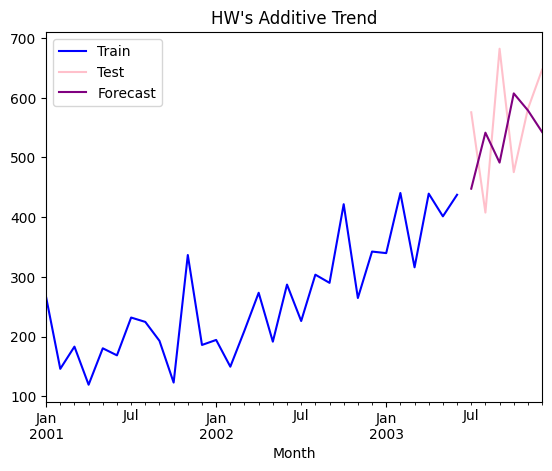

16487.754175120604


In [310]:
### no params - autotuning
fit1 = hw_add.fit()
print(fit1.params)
fcast1 = fit1.forecast(len(y_test))
# plot
y_train.plot(color="blue", label='Train')
y_test.plot(color="pink", label='Test')
fcast1.plot(color="purple", label='Forecast')
plt.title("HW's Additive Trend")
plt.legend(loc='best')
plt.show()

print(mean_squared_error(y_test, fcast1))

# checking is data is stationary or not

            Sales of shampoo over a three year period
Month                                                
2001-01-01                                      266.0
2001-02-01                                      145.9
2001-03-01                                      183.1
2001-04-01                                      119.3
2001-05-01                                      180.3


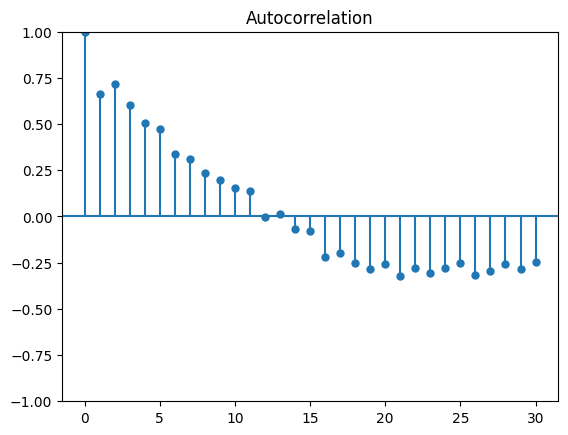

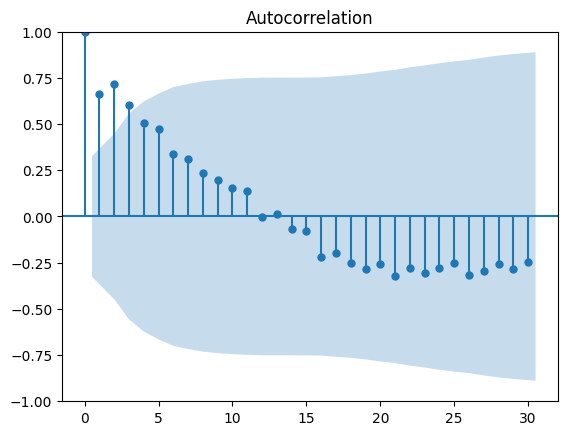

[ 1.          0.66255777  0.7165448   0.60323689  0.50618008  0.47474817
  0.33604178  0.3101703   0.23757292  0.19586055  0.1518714   0.13957659
 -0.00304812  0.01174439 -0.06558828 -0.07950614]
P-Value = 1.0
Time Series is not Stationary


In [323]:
import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\Datasets")
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

df=pd.read_csv("sales-of-shampoo-over-a-three-ye.csv",index_col=0)
print(df.head())

plot_acf(df['Sales of shampoo over a three year period'], lags=30,alpha=None)
plt.show()

plot_acf(df['Sales of shampoo over a three year period'], lags=30)
plt.show()

acf_vals = sm.tsa.acf(df['Sales of shampoo over a three year period'])
print(acf_vals)

###### Stationarity Test
result = adfuller(df['Sales of shampoo over a three year period'], maxlag=10)
print("P-Value =", result[1])
if result[1] < 0.05:
    print("Time Series is Stationary")
else:
    print("Time Series is not Stationary")

# Automatic ARIMA function

In [324]:
from pmdarima.arima import auto_arima

In [345]:
df = pd.read_csv("sales-of-shampoo-over-a-three-ye.csv",
                 index_col=0)
df.index = pd.to_datetime( df.index ).to_period("M")

y = df['Sales of shampoo over a three year period']
y_train = df['Sales of shampoo over a three year period'].iloc[:-6]
y_test = df['Sales of shampoo over a three year period'].iloc[-6:]


In [356]:
# AIC -akaike information criteria
model =auto_arima(y_train,trace=True,error_action="ignore",suppress_warnings=True)   # it is like a grid search

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.982 seconds


In [347]:
predictions=model.predict(n_periods=len(y_test))
y_train.index

PeriodIndex(['2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
             '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
             '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
             '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12',
             '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06'],
            dtype='period[M]', name='Month')

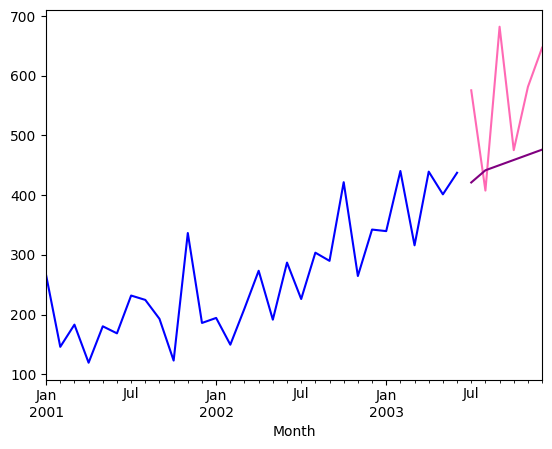

In [348]:
y_train.plot(color="blue")
y_test.plot(color="hotpink")
predictions.plot(color="purple")
plt.show()

In [350]:
error=mean_squared_error(y_test,predictions)
print("test mse:",error)

test mse: 20177.740104446228


In [355]:
# checking version
import pmdarima
pmdarima.__version__

'2.0.4'